In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import imdb

In [4]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

17465344/17464789 [==============================] - 1s 0us/step


In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [6]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [7]:
word_idx = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
idx_word = dict([value, key] for (key, value) in word_idx.items())

In [0]:
# get a review
# ? - replace those with ? which are not in the vocabulary

review = ' '.join(idx_word.get(idx-3, '?') for idx in x_train[0])

In [13]:
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
## Create a 2-D tensor to be processed by the embedding layer
from keras.preprocessing import sequence


In [0]:
x_train = sequence.pad_sequences(x_train, maxlen=500)
x_test = sequence.pad_sequences(x_test, maxlen=500)

In [18]:
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

#### Create Model

In [0]:
from keras.models import Sequential
from keras.layers import *

In [0]:
rnn = Sequential()

In [0]:
rnn.add(Embedding(10000,64))

In [0]:
rnn.add(SimpleRNN(32)) # unit is not the number of cells but activation dims

In [0]:
rnn.add(Dense(1, activation='sigmoid'))

In [63]:
rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          640000    
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 643,137
Trainable params: 643,137
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compiling model
rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
hist = rnn.fit(x_train, y_train, validation_split=0.2, batch_size=256, epochs=10)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.5691 - acc: 0.7033 - val_loss: 0.4256 - val_acc: 0.8200
Epoch 2/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.3679 - acc: 0.8515 - val_loss: 0.3950 - val_acc: 0.8354
Epoch 3/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2999 - acc: 0.8836 - val_loss: 0.4114 - val_acc: 0.8266
Epoch 4/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2320 - acc: 0.9123 - val_loss: 0.3941 - val_acc: 0.8404
Epoch 5/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1451 - acc: 0.9528 - val_loss: 0.4083 - val_acc: 0.8338
Epoch 6/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0876 - acc: 0.9750 - val_loss: 0.4321 - val_acc: 0.8502
Epoch 7/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.0479 - acc: 0.9889 - val_loss: 0.5357 - val_acc:

In [0]:


def plot_loss_accuracy(hist):
  # plot loss
  print("training_loss =", hist.history['loss'][-1],  "   val_loss =", hist.history['val_loss'][-1])
  print("training_acc =", hist.history['acc'][-1]*100, "   val_acc =", hist.history['val_acc'][-1]*100)
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.plot(hist.history['loss'], label='training_loss')

  # plot accuracy
  plt.plot(hist.history['val_acc'], label='val_acc')
  plt.plot(hist.history['acc'], label='training_acc')
  plt.legend()
  plt.show()



training_loss = 0.013742833395302296    val_loss = 0.6066828558921814
training_acc = 99.795    val_acc = 83.4600000667572


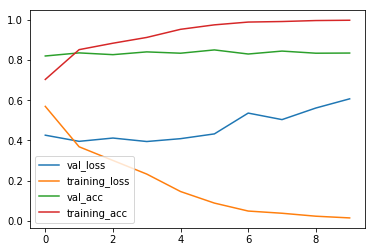

In [70]:
plot_loss_accuracy(hist)